In [82]:
import numpy as np 
import pandas as pd

In [15]:
match = pd.read_csv('matches.csv')
delivery = pd.read_csv('deliveries.csv')

In [17]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [19]:
match.shape

(756, 18)

In [21]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [23]:
total_score_df = delivery.groupby(['match_id', 'inning']).sum()['total_runs'].reset_index()
print(total_score_df)


      match_id  inning  total_runs
0            1       1         207
1            1       2         172
2            2       1         184
3            2       2         187
4            3       1         183
...        ...     ...         ...
1523     11413       2         170
1524     11414       1         155
1525     11414       2         162
1526     11415       1         152
1527     11415       2         157

[1528 rows x 3 columns]


In [25]:
total_score_df[total_score_df['inning'] == 1]

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [27]:
match_df = match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')


In [29]:
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,172
2,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
3,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,187
4,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,170
1524,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155
1525,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,162
1526,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong,11415,152


In [31]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [33]:
# here we have to keep only those teams who are still playing and also we need to change the name of the teams which have been
#changed 
teams = [
    'Sunrisers Hyderabad',
    'Mumbai Indians',
    'Royal Challengers Bangalore',
    'Kolkata Knight Riders',
    'Kings XI Punjab',
    'Chennai Super Kings', 
    'Rajasthan Royals',
    'Delhi Capitals'
]

In [104]:
match_df['team1'] = match_df['team1'].str.replace('Delhi Daredevils', 'Delhi Capitals')
match_df['team2'] = match_df['team2'].str.replace('Delhi Daredevils', 'Delhi Capitals')

In [106]:
match_df['team1'] = match_df['team1'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')
match_df['team2'] = match_df['team2'].str.replace('Deccan Chargers', 'Sunrisers Hyderabad')

In [108]:
match_df = match_df[match_df['team1'].isin(teams)]
match_df = match_df[match_df['team2'].isin(teams)]

In [110]:
match_df.shape

(1297, 20)

In [35]:
match_df['dl_applied'].value_counts()

dl_applied
0    1490
1      38
Name: count, dtype: int64

In [37]:
match_df[match_df['dl_applied'] == 0]


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,172
2,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
3,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,187
4,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1523,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,170
1524,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155
1525,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,162
1526,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Mumbai Indians,1,0,JJ Bumrah,Rajiv Gandhi Intl. Cricket Stadium,Nitin Menon,Ian Gould,Nigel Llong,11415,152


In [122]:
# now in match_df the column we need we will choose that and join with delivery data 
#like some columns which are not in match table are prsent in delivery table so ween to join these two table 

match_df = match_df[['match_id', 'city', 'winner', 'total_runs']]
match_df

,match_id,city,winner,total_runs
0,1,Hyderabad,Sunrisers Hyderabad,207
1,1,Hyderabad,Sunrisers Hyderabad,172
8,5,Bangalore,Royal Challengers Bangalore,157
9,5,Bangalore,Royal Challengers Bangalore,142
12,7,Mumbai,Mumbai Indians,178
...,...,...,...,...
1523,11413,Visakhapatnam,Delhi Capitals,170
1524,11414,Visakhapatnam,Chennai Super Kings,155
1525,11414,Visakhapatnam,Chennai Super Kings,162
1526,11415,Hyderabad,Mumbai Indians,152


In [39]:
delivery_df = match_df.merge(delivery,on = 'match_id')
delivery_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362628,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
362629,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
362630,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
362631,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [126]:
delivery_df = delivery_df[delivery_df['inning'] == 2]
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,0,0,0,1,0,1,NaN,NaN,NaN
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,0,0,0,NaN,NaN,NaN
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,0,0,0,2,0,2,NaN,NaN,NaN
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,0,0,0,4,0,4,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303165,11415,Hyderabad,Mumbai Indians,157,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,0,0,0,1,0,1,NaN,NaN,NaN
303166,11415,Hyderabad,Mumbai Indians,157,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,0,0,0,2,0,2,NaN,NaN,NaN
303167,11415,Hyderabad,Mumbai Indians,157,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
303168,11415,Hyderabad,Mumbai Indians,157,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [41]:
delivery_df.shape

(362633, 40)

In [156]:
import pandas as pd

# Ensure 'total_runs_y' is numeric using .loc to avoid SettingWithCopyWarning
delivery_df.loc[:, 'total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y'], errors='coerce')

# Now apply cumsum within each 'match_id' group using .loc
delivery_df.loc[:, 'current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()


In [158]:
delivery_df.loc[:, 'current_score']

125         1
126         1
127         1
128         3
129         7
         ... 
303165    309
303166    311
303167    312
303168    314
303169    314
Name: current_score, Length: 146822, dtype: int64

In [43]:
delivery_df


,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362628,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
362629,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
362630,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,1,0,1,SR Watson,run out,KH Pandya
362631,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN


In [51]:
import pandas as pd

# Ensure the column is numeric
delivery_df['total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y'], errors='coerce')

# Fill NaN values with 0 if they exist (optional, based on data cleaning needs)
delivery_df['total_runs_y'].fillna(0, inplace=True)

# Compute cumulative sum grouped by 'match_id'
delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

print(delivery_df.head())


   id    Season       city        date                team1  \
0   1  IPL-2017  Hyderabad  05-04-2017  Sunrisers Hyderabad   
1   1  IPL-2017  Hyderabad  05-04-2017  Sunrisers Hyderabad   
2   1  IPL-2017  Hyderabad  05-04-2017  Sunrisers Hyderabad   
3   1  IPL-2017  Hyderabad  05-04-2017  Sunrisers Hyderabad   
4   1  IPL-2017  Hyderabad  05-04-2017  Sunrisers Hyderabad   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
2  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
3  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
4  Royal Challengers Bangalore  Royal Challengers Bangalore         field   

   result  dl_applied  ... legbye_runs  noball_runs  penalty_runs  \
0  normal           0  ...           0            0             0   
1  normal           

C:\Users\decent\AppData\Local\Temp\ipykernel_5204\2179613855.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  delivery_df['total_runs_y'].fillna(0, inplace=True)


In [53]:
import pandas as pd

# Ensure 'total_runs_y' is numeric
delivery_df['total_runs_y'] = pd.to_numeric(delivery_df['total_runs_y'], errors='coerce')
delivery_df['total_runs_y'].fillna(0, inplace=True)

# Compute 'current_score' if not already done
if 'current_score' not in delivery_df.columns:
    delivery_df['current_score'] = delivery_df.groupby('match_id')['total_runs_y'].cumsum()

# Check if 'total_runs_x' exists
if 'total_runs_x' not in delivery_df.columns:
    raise KeyError("'total_runs_x' is missing from the DataFrame. Please ensure it is defined.")

# Calculate 'runs_left'
delivery_df['runs_left'] = delivery_df['total_runs_x'] - delivery_df['current_score']

print(delivery_df.head())


   id    Season       city        date                team1  \
0   1  IPL-2017  Hyderabad  05-04-2017  Sunrisers Hyderabad   
1   1  IPL-2017  Hyderabad  05-04-2017  Sunrisers Hyderabad   
2   1  IPL-2017  Hyderabad  05-04-2017  Sunrisers Hyderabad   
3   1  IPL-2017  Hyderabad  05-04-2017  Sunrisers Hyderabad   
4   1  IPL-2017  Hyderabad  05-04-2017  Sunrisers Hyderabad   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
2  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
3  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
4  Royal Challengers Bangalore  Royal Challengers Bangalore         field   

   result  dl_applied  ... noball_runs  penalty_runs  batsman_runs extra_runs  \
0  normal           0  ...           0             0             0          0

C:\Users\decent\AppData\Local\Temp\ipykernel_5204\445521837.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  delivery_df['total_runs_y'].fillna(0, inplace=True)


In [55]:
delivery_df['balls_left'] = 126 - (delivery_df['over']*6 + delivery_df['ball'])

In [57]:
delivery_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,NaN,NaN,NaN,0,207,119
1,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,NaN,NaN,NaN,0,207,118
2,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,4,0,4,NaN,NaN,NaN,4,203,117
3,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,0,0,NaN,NaN,NaN,4,203,116
4,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,...,0,0,2,2,NaN,NaN,NaN,6,201,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362628,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,1,0,1,NaN,NaN,NaN,613,-456,4
362629,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,2,0,2,NaN,NaN,NaN,615,-458,3
362630,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,1,0,1,SR Watson,run out,KH Pandya,616,-459,2
362631,11415,IPL-2019,Hyderabad,12-05-2019,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,...,0,2,0,2,NaN,NaN,NaN,618,-461,1


In [61]:
import pandas as pd

# Ensure 'player_dismissed' column has no NaN values and is numeric
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].fillna("0")
delivery_df['player_dismissed'] = delivery_df['player_dismissed'].apply(lambda x: 0 if x == "0" else 1).astype(int)

# Compute cumulative sum for 'player_dismissed' within each match group
delivery_df['cumulative_wickets'] = delivery_df.groupby('match_id')['player_dismissed'].cumsum()

# Calculate remaining wickets
delivery_df['wickets'] = 10 - delivery_df['cumulative_wickets']

# Display the head of the DataFrame
print(delivery_df.head())


   id    Season       city        date                team1  \
0   1  IPL-2017  Hyderabad  05-04-2017  Sunrisers Hyderabad   
1   1  IPL-2017  Hyderabad  05-04-2017  Sunrisers Hyderabad   
2   1  IPL-2017  Hyderabad  05-04-2017  Sunrisers Hyderabad   
3   1  IPL-2017  Hyderabad  05-04-2017  Sunrisers Hyderabad   
4   1  IPL-2017  Hyderabad  05-04-2017  Sunrisers Hyderabad   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
2  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
3  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
4  Royal Challengers Bangalore  Royal Challengers Bangalore         field   

   result  dl_applied  ... extra_runs  total_runs_y  player_dismissed  \
0  normal           0  ...          0             0                 1   
1  normal   

In [75]:
delivery_df.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,...,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,cumulative_wickets,wickets,crr,rrr
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,1,0,...,1,NaN,NaN,0,207,119,1,9,0.0,10.436975
1,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,1,0,...,1,NaN,NaN,0,207,118,2,8,0.0,10.525424
2,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,1,0,...,1,NaN,NaN,4,203,117,3,7,8.0,10.410256
3,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,1,0,...,1,NaN,NaN,4,203,116,4,6,6.0,10.500000
4,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,1,0,...,1,NaN,NaN,6,201,115,5,5,7.2,10.486957


In [77]:
# crr = runs/overs
delivery_df['crr'] = (delivery_df['current_score']*6)/(120 - delivery_df['balls_left'])

In [79]:
delivery_df['rrr'] = (delivery_df['runs_left']*6)/delivery_df['balls_left']

In [71]:
def result(row):
    return 1 if row['batting_team'] == row['winner'] else 0

In [81]:
delivery_df['result'] = delivery_df.apply(result,axis=1)

In [83]:
final_df = delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [85]:
final_df = final_df.sample(final_df.shape[0])

In [87]:
final_df.sample()

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
252638,Rajasthan Royals,Mumbai Indians,Ahmedabad,-109,34,-198,164,19.046512,-19.235294,1


In [89]:
final_df.dropna(inplace=True)

In [91]:
final_df = final_df[final_df['balls_left'] != 0]

In [95]:
X = final_df.iloc[:,:-1]
y = final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [97]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
179193,Royal Challengers Bangalore,Deccan Chargers,Hyderabad,-36,97,-137,132,43.826087,-2.226804
289348,Gujarat Lions,Kings XI Punjab,Rajkot,-365,59,-420,131,48.786885,-37.118644
272256,Kolkata Knight Riders,Mumbai Indians,Mumbai,-378,91,-404,166,112.551724,-24.923077
157256,Kolkata Knight Riders,Kings XI Punjab,Chandigarh,-354,31,-424,127,32.426966,-68.516129
148032,Rajasthan Royals,Kings XI Punjab,Jaipur,-317,30,-334,160,31.800000,-63.400000
...,...,...,...,...,...,...,...,...,...
76292,Kings XI Punjab,Delhi Daredevils,Bloemfontein,-39,80,-161,120,23.850000,-2.925000
181128,Chennai Super Kings,Delhi Daredevils,Chennai,55,24,-88,222,10.437500,13.750000
24638,Rising Pune Supergiant,Delhi Daredevils,Delhi,-389,83,-401,161,89.189189,-28.120482
201708,Royal Challengers Bangalore,Rajasthan Royals,Jaipur,-248,59,-300,173,41.409836,-25.220339


In [101]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf = ColumnTransformer(
    [
        ('trf', OneHotEncoder(sparse_output=False, drop='first'), ['batting_team', 'bowling_team', 'city'])
    ],
    remainder='passthrough'
)


In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline

In [105]:
pipe = Pipeline(steps=[
    ('step1',trf),
    ('step2',LogisticRegression(solver='liblinear'))
])

In [107]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse_output=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [113]:
y_pred = pipe.predict(X_test)

In [115]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.6163944521420274

In [117]:
pipe.predict_proba(X_test)[10]

array([0.79016324, 0.20983676])

In [119]:
def match_summary(row):
    print("Batting Team-" + row['batting_team'] + " | Bowling Team-" + row['bowling_team'] + " | Target- " + str(row['total_runs_x']))
    

In [121]:
def match_progression(x_df,match_id,pipe):
    match = x_df[x_df['match_id'] == match_id]
    match = match[(match['ball'] == 6)]
    temp_df = match[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr']].dropna()
    temp_df = temp_df[temp_df['balls_left'] != 0]
    result = pipe.predict_proba(temp_df)
    temp_df['lose'] = np.round(result.T[0]*100,1)
    temp_df['win'] = np.round(result.T[1]*100,1)
    temp_df['end_of_over'] = range(1,temp_df.shape[0]+1)
    
    target = temp_df['total_runs_x'].values[0]
    runs = list(temp_df['runs_left'].values)
    new_runs = runs[:]
    runs.insert(0,target)
    temp_df['runs_after_over'] = np.array(runs)[:-1] - np.array(new_runs)
    wickets = list(temp_df['wickets'].values)
    new_wickets = wickets[:]
    new_wickets.insert(0,10)
    wickets.append(0)
    w = np.array(wickets)
    nw = np.array(new_wickets)
    temp_df['wickets_in_over'] = (nw - w)[0:temp_df.shape[0]]
    
    print("Target-",target)
    temp_df = temp_df[['end_of_over','runs_after_over','wickets_in_over','lose','win']]
    return temp_df,target
    

In [125]:
import numpy as np
temp_df,target = match_progression(delivery_df,74,pipe)
temp_df

Target- 178


,end_of_over,runs_after_over,wickets_in_over,lose,win
34833,1,1,6,38.2,61.8
34839,2,10,6,38.5,61.5
34845,3,4,6,38.6,61.4
34853,4,7,8,38.6,61.4
34859,5,3,6,38.6,61.4
...,...,...,...,...,...
35292,72,5,6,62.6,37.4
35299,73,8,7,62.8,37.2
35305,74,8,6,63.3,36.7
35311,75,6,6,63.8,36.2


Text(0.5, 1.0, 'Target-178')

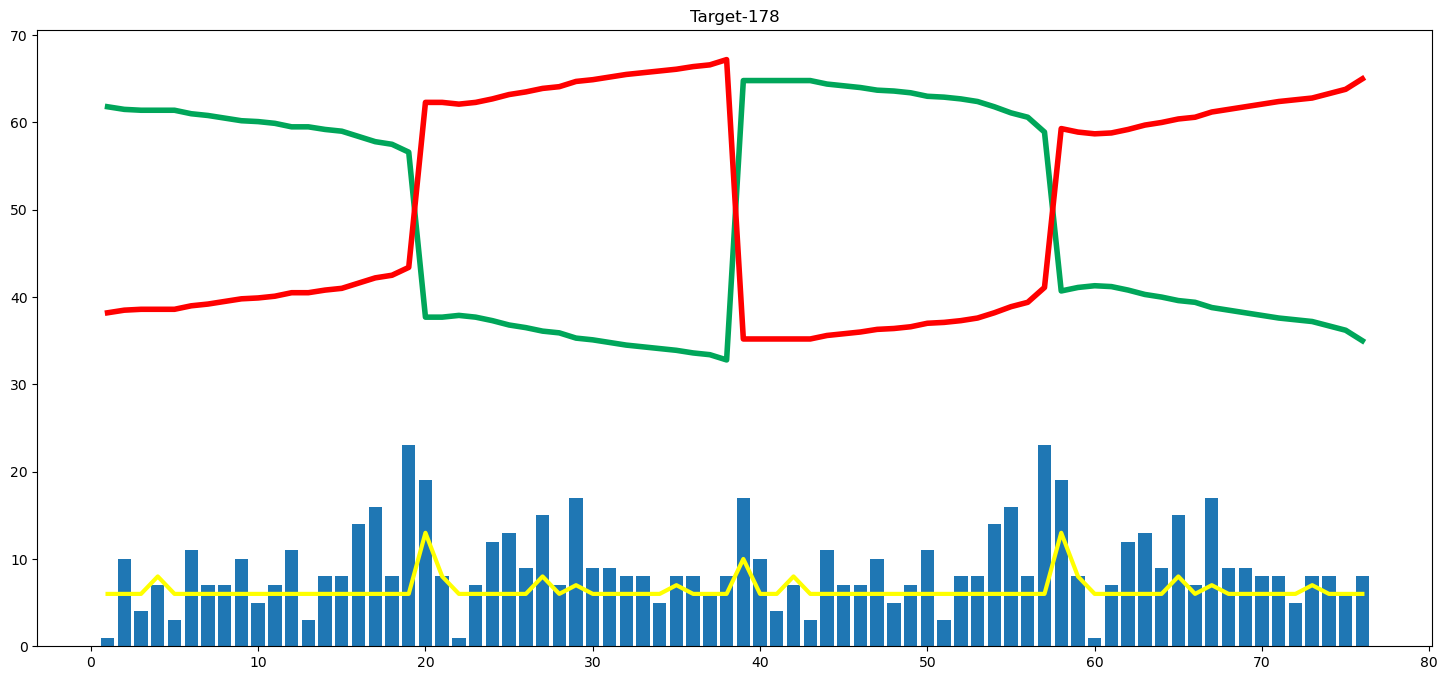

In [127]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,8))
plt.plot(temp_df['end_of_over'],temp_df['wickets_in_over'],color='yellow',linewidth=3)
plt.plot(temp_df['end_of_over'],temp_df['win'],color='#00a65a',linewidth=4)
plt.plot(temp_df['end_of_over'],temp_df['lose'],color='red',linewidth=4)
plt.bar(temp_df['end_of_over'],temp_df['runs_after_over'])
plt.title('Target-' + str(target))

In [129]:
teams

['Sunrisers Hyderabad',
 'Mumbai Indians',
 'Royal Challengers Bangalore',
 'Kolkata Knight Riders',
 'Kings XI Punjab',
 'Chennai Super Kings',
 'Rajasthan Royals',
 'Delhi Capitals']

In [131]:
delivery_df['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

In [133]:
import pickle
pickle.dump(pipe,open('pipe.pkl','wb'))

In [149]:
import subprocess
import sys

# Install TensorFlow using pip from within Python
def install_tensorflow():
    subprocess.check_call([sys.executable, "-m", "pip", "install", "tensorflow"])

# Call the function to install TensorFlow
install_tensorflow()

# Verify the installation
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.18.0


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load datasets (ensure paths are correct)
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

# Merge datasets on match_id
merged = pd.merge(deliveries, matches, left_on='match_id', right_on='id')

# Select relevant columns
data = merged[['batting_team', 'bowling_team', 'city', 'total_runs', 'winner']]

# Drop missing values
data.dropna(inplace=True)

# Encode categorical features
encoder = LabelEncoder()
data['batting_team'] = encoder.fit_transform(data['batting_team'])
data['bowling_team'] = encoder.fit_transform(data['bowling_team'])
data['city'] = encoder.fit_transform(data['city'])
data['winner'] = encoder.fit_transform(data['winner'])

# Features and target variable
X = data[['batting_team', 'bowling_team', 'city', 'total_runs']]
y = data['winner']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10, min_samples_split=5)
rf_model.fit(X_train, y_train)

# Predict and evaluate the model
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print("Random Forest Accuracy:", rf_accuracy)


C:\Users\decent\AppData\Local\Temp\ipykernel_16284\3251584620.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\decent\AppData\Local\Temp\ipykernel_16284\3251584620.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['batting_team'] = encoder.fit_transform(data['batting_team'])
C:\Users\decent\AppData\Local\Temp\ipykernel_16284\3251584620.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

Random Forest Accuracy: 0.7183492458053218


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# Load datasets (ensure paths are correct)
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

# Merge datasets on match_id
merged = pd.merge(deliveries, matches, left_on='match_id', right_on='id')

# Select relevant columns
data = merged[['batting_team', 'bowling_team', 'city', 'total_runs', 'winner']]

# Drop missing values
data.dropna(inplace=True)

# Encode categorical features
encoder = LabelEncoder()
data['batting_team'] = encoder.fit_transform(data['batting_team'])
data['bowling_team'] = encoder.fit_transform(data['bowling_team'])
data['city'] = encoder.fit_transform(data['city'])
data['winner'] = encoder.fit_transform(data['winner'])

# Features and target variable
X = data[['batting_team', 'bowling_team', 'city', 'total_runs']]
y = data['winner']

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the model
dt_model = DecisionTreeClassifier(random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=dt_model, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_dt_model = grid_search.best_estimator_
print("Best parameters found by GridSearchCV:", grid_search.best_params_)

# Predict using the best model
dt_predictions = best_dt_model.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Tuned Decision Tree Accuracy:", dt_accuracy)


C:\Users\decent\AppData\Local\Temp\ipykernel_16284\2147144657.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\decent\AppData\Local\Temp\ipykernel_16284\2147144657.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['batting_team'] = encoder.fit_transform(data['batting_team'])
C:\Users\decent\AppData\Local\Temp\ipykernel_16284\2147144657.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

Fitting 3 folds for each of 288 candidates, totalling 864 fits


C:\Users\decent\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
216 fits failed out of a total of 864.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
132 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\decent\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\decent\anaconda3\Lib\site-packages\sklearn\base.py", line 1467, in wrapper
    estimator._validate_params()
  File "C:\Users\decent\anaconda3\Lib\site-packages\sklearn\base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\decent\anaconda3\Lib\site-p

Best parameters found by GridSearchCV: {'criterion': 'gini', 'max_depth': 30, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Tuned Decision Tree Accuracy: 0.7901248517032936


In [33]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load datasets
matches = pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

# Merge datasets
merged = pd.merge(deliveries, matches, left_on='match_id', right_on='id')

# Select relevant columns
data = merged[['batting_team', 'bowling_team', 'city', 'total_runs', 'winner']]

# Drop missing values
data.dropna(inplace=True)

# Encode categorical features
encoder = LabelEncoder()
data['batting_team'] = encoder.fit_transform(data['batting_team'])
data['bowling_team'] = encoder.fit_transform(data['bowling_team'])
data['city'] = encoder.fit_transform(data['city'])
data['winner'] = encoder.fit_transform(data['winner'])

# Features and target variable
X = data[['batting_team', 'bowling_team', 'city', 'total_runs']]
y = data['winner']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost
xgb_model = XGBClassifier(n_estimators=200, max_depth=10, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, y_train)

# Evaluate
xgb_predictions = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)


C:\Users\decent\AppData\Local\Temp\ipykernel_16284\867888330.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)
C:\Users\decent\AppData\Local\Temp\ipykernel_16284\867888330.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['batting_team'] = encoder.fit_transform(data['batting_team'])
C:\Users\decent\AppData\Local\Temp\ipykernel_16284\867888330.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

XGBoost Accuracy: 0.7899836167448167


# visualization using Matplotlib

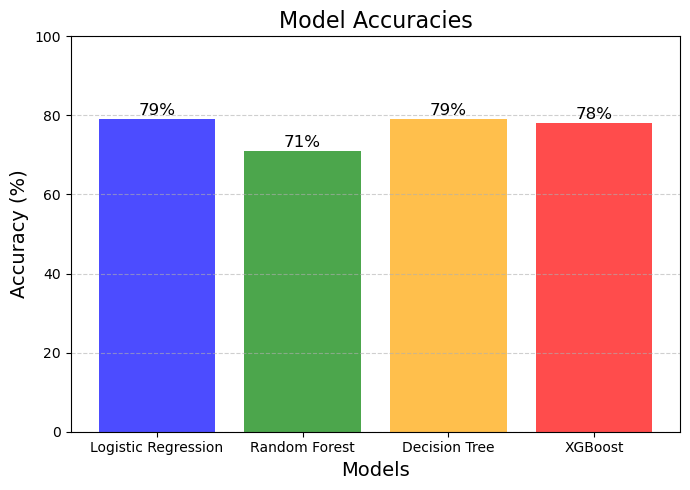

In [38]:
import matplotlib.pyplot as plt

models = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBoost']
accuracies = [79, 71, 79, 78]

plt.figure(figsize=(7, 5))
bars = plt.bar(models, accuracies, color=['blue', 'green', 'orange', 'red'], alpha=0.7)

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f"{bar.get_height()}%", 
             ha='center', fontsize=12, color='black')

plt.title("Model Accuracies", fontsize=16)
plt.xlabel("Models", fontsize=14)
plt.ylabel("Accuracy (%)", fontsize=14)
plt.ylim(0, 100)  # Set y-axis limit for better visualization
plt.grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()


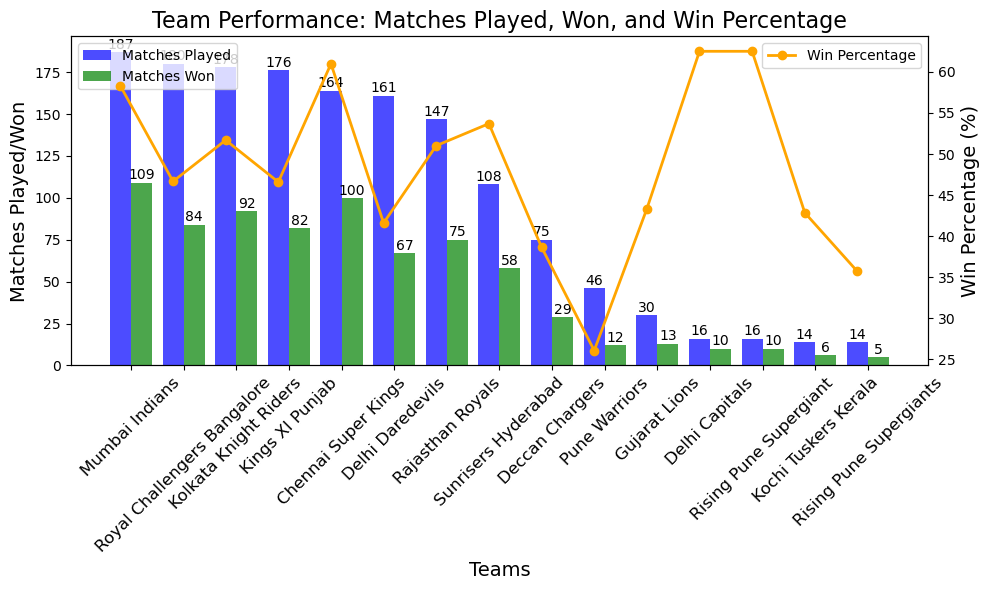

In [86]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the matches dataset
matches = pd.read_csv('matches.csv')

# Calculate matches played by each team
teams_played = matches['team1'].value_counts() + matches['team2'].value_counts()

# Calculate matches won by each team
teams_won = matches['winner'].value_counts()

# Compute win percentage
win_percentage = (teams_won / teams_played * 100).round(2)

# Create a DataFrame to organize the data
team_stats = pd.DataFrame({
    'Played': teams_played,
    'Won': teams_won,
    'Win Percentage': win_percentage
}).fillna(0).sort_values('Played', ascending=False)

# Plot the data
fig, ax = plt.subplots(figsize=(10, 6))
x = range(len(team_stats))

# Bar chart for matches played and won
bar1 = ax.bar(x, team_stats['Played'], width=0.4, label='Matches Played', color='blue', alpha=0.7)
bar2 = ax.bar([i + 0.4 for i in x], team_stats['Won'], width=0.4, label='Matches Won', color='green', alpha=0.7)

# Line plot for win percentage
ax2 = ax.twinx()
line = ax2.plot(x, team_stats['Win Percentage'], label='Win Percentage', color='orange', marker='o', linewidth=2)

# Adding labels
ax.set_title('Team Performance: Matches Played, Won, and Win Percentage', fontsize=16)
ax.set_xlabel('Teams', fontsize=14)
ax.set_ylabel('Matches Played/Won', fontsize=14)
ax2.set_ylabel('Win Percentage (%)', fontsize=14)
ax.set_xticks([i + 0.2 for i in x])
ax.set_xticklabels(team_stats.index, rotation=45, fontsize=12)

# Adding data labels on bars
for bar in bar1:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, int(bar.get_height()), ha='center', fontsize=10)
for bar in bar2:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 2, int(bar.get_height()), ha='center', fontsize=10)

# Legends
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


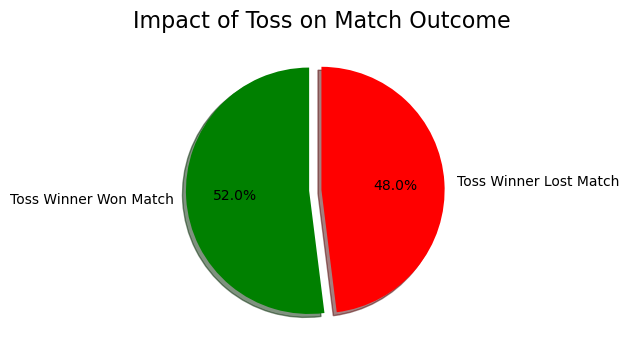

In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the matches dataset
matches = pd.read_csv('matches.csv')

# Calculate toss impact
toss_win_match_win = matches[matches['toss_winner'] == matches['winner']].shape[0]
toss_win_match_lose = matches[matches['toss_winner'] != matches['winner']].shape[0]

# Prepare data for the pie chart
labels = ['Toss Winner Won Match', 'Toss Winner Lost Match']
sizes = [toss_win_match_win, toss_win_match_lose]
colors = ['green', 'red']
explode = (0.1, 0)  # Slightly explode the first slice for emphasis

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Impact of Toss on Match Outcome', fontsize=16)
plt.show()


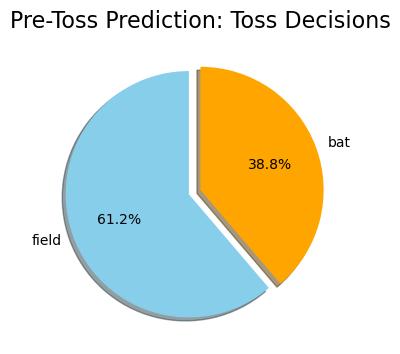

In [50]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the matches dataset
matches = pd.read_csv('matches.csv')

# Count toss decisions
toss_decision_counts = matches['toss_decision'].value_counts()

# Prepare data for the pie chart
labels = toss_decision_counts.index
sizes = toss_decision_counts.values
colors = ['skyblue', 'orange']
explode = (0.1, 0)  # Slightly explode the first slice for emphasis

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Pre-Toss Prediction: Toss Decisions', fontsize=16)
plt.show()


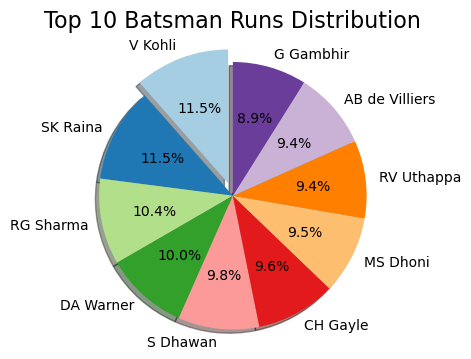

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the deliveries dataset
deliveries = pd.read_csv('deliveries.csv')

# Calculate total runs scored by each batsman
batsman_runs = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False)

# Select top 10 batsmen (optional, adjust if needed)
top_batsmen = batsman_runs.head(10)

# Prepare data for the pie chart
labels = top_batsmen.index
sizes = top_batsmen.values
colors = plt.cm.Paired(range(len(labels)))  # Generate distinct colors
explode = (0.1,) + (0,) * (len(labels) - 1)  # Exploding the first slice for emphasis

# Plot the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sizes, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Top 10 Batsman Runs Distribution', fontsize=16)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


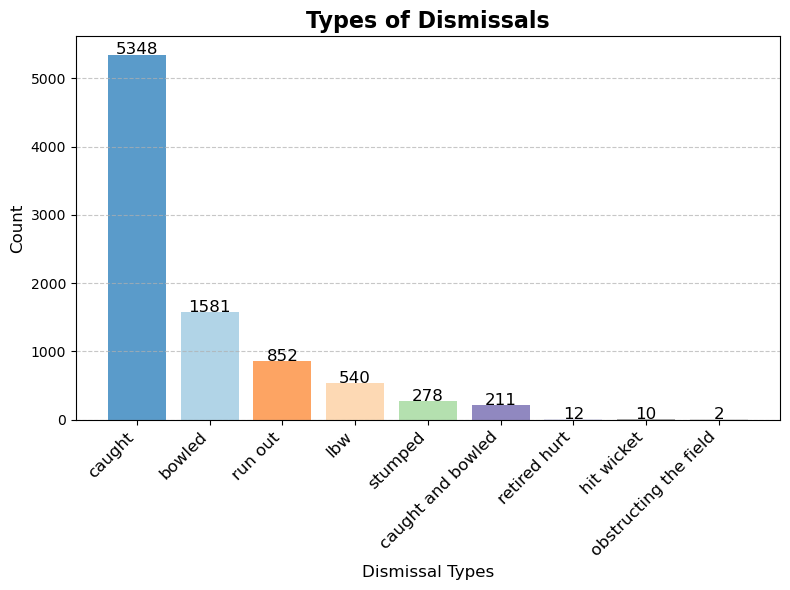

In [82]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the deliveries dataset
deliveries = pd.read_csv('deliveries.csv')

# Count the types of dismissals
dismissals_count = deliveries['dismissal_kind'].value_counts()

# Create a color palette with distinct colors
colors = plt.cm.tab20c(np.linspace(0, 1, len(dismissals_count)))

# Plot the bar graph with distinct colors
plt.figure(figsize=(8, 6))
bars = plt.bar(dismissals_count.index, dismissals_count.values, color=colors, alpha=0.8)

# Add data labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 2,
             f'{int(bar.get_height())}', ha='center', fontsize=12, color='black')

# Add labels and title
plt.title('Types of Dismissals', fontsize=16, fontweight='bold')
plt.xlabel('Dismissal Types', fontsize=12)
plt.ylabel('Count', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=12)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


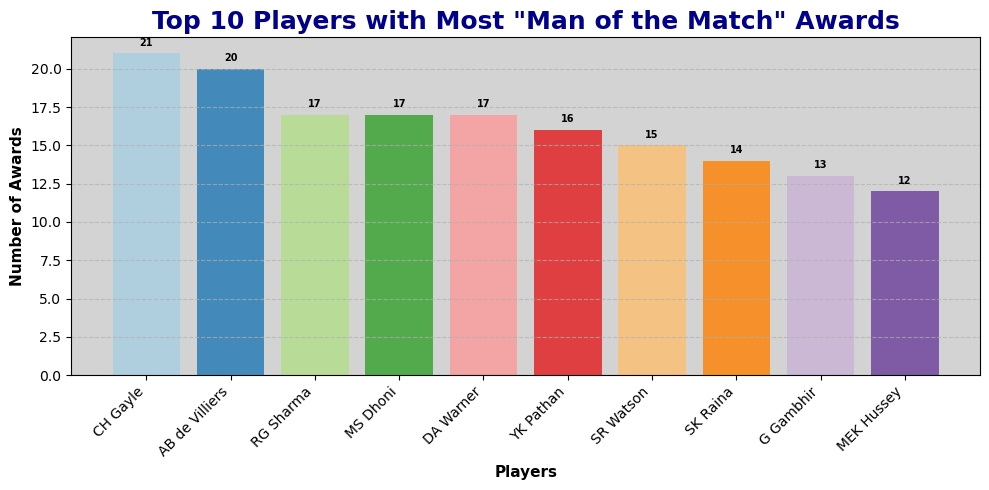

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the matches dataset
matches = pd.read_csv('matches.csv')

# Count the number of "Man of the Match" awards for each player
man_of_match_count = matches['player_of_match'].value_counts()

# Select top 10 players for better clarity (you can adjust this number as needed)
top_players = man_of_match_count.head(10)

# Create a color palette (using a predefined color palette for clarity)
colors = plt.cm.Paired(range(len(top_players)))

# Plot the bar graph with distinct colors
plt.figure(figsize=(10, 5))
bars = plt.bar(top_players.index, top_players.values, color=colors, alpha=0.8)

# Add data labels on top of each bar
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5,
             f'{int(bar.get_height())}', ha='center', fontsize=7, color='black', fontweight='bold')

# Add title and labels
plt.title('Top 10 Players with Most "Man of the Match" Awards', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Players', fontsize=11, fontweight='bold')
plt.ylabel('Number of Awards', fontsize=11, fontweight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right', fontsize=10)

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add background color for the plot area
plt.gca().set_facecolor('lightgray')

# Improve layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


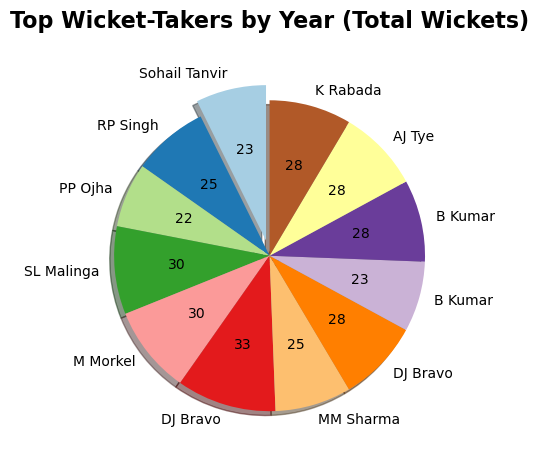

In [150]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the matches dataset
matches = pd.read_csv('matches.csv')

# Convert 'date' column to datetime using the correct format (day-month-year)
matches['year'] = pd.to_datetime(matches['date'], format='%d-%m-%Y').dt.year

# Load the deliveries dataset
deliveries = pd.read_csv('deliveries.csv')

# Merge deliveries with matches to include the 'year' in the deliveries dataset
deliveries = deliveries.merge(matches[['id', 'year']], left_on='match_id', right_on='id', how='left')

# Count wickets taken by each player in each year
# A wicket occurs if 'dismissal_kind' is not NaN (i.e., the player got out)
wickets_per_year = deliveries[deliveries['dismissal_kind'].notna()].groupby(['year', 'bowler'])['dismissal_kind'].count().reset_index()

# Find the top wicket-taker for each year
top_wicket_taker_per_year = wickets_per_year.loc[wickets_per_year.groupby('year')['dismissal_kind'].idxmax()]

# Prepare the data for the pie chart
labels = top_wicket_taker_per_year['bowler']
sizes = top_wicket_taker_per_year['dismissal_kind']
colors = plt.cm.Paired(np.linspace(0, 1, len(top_wicket_taker_per_year)))

# Create a function to display total wickets instead of percentages
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))  # Calculate total wickets for each player
    return f"{absolute}"

# Plot the pie chart
plt.figure(figsize=(5, 4.8))
plt.pie(sizes, labels=labels, colors=colors, autopct=lambda pct: func(pct, sizes), startangle=90, explode=(0.1,) + (0,) * (len(sizes) - 1), shadow=True)

# Title and display settings
plt.title('Top Wicket-Takers by Year (Total Wickets)', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Show the plot
plt.tight_layout()
plt.show()


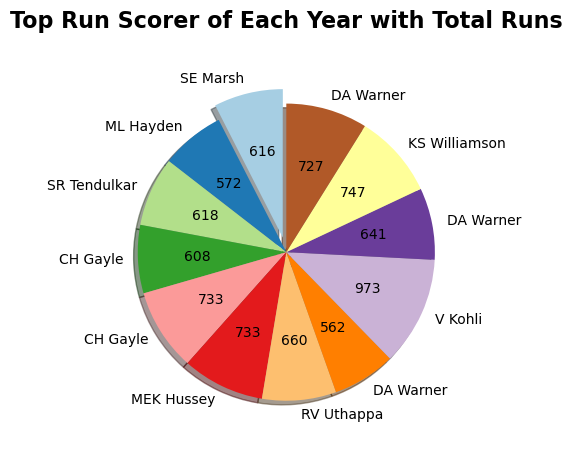

In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the matches dataset
matches = pd.read_csv('matches.csv')

# Convert 'date' column to datetime using the correct format (day-month-year)
matches['year'] = pd.to_datetime(matches['date'], format='%d-%m-%Y').dt.year

# Load the deliveries dataset
deliveries = pd.read_csv('deliveries.csv')

# Merge deliveries with matches to include the 'year' in the deliveries dataset
deliveries = deliveries.merge(matches[['id', 'year']], left_on='match_id', right_on='id', how='left')

# Calculate total runs for each batsman in each year
player_runs_per_year = deliveries.groupby(['year', 'batsman'])['batsman_runs'].sum().reset_index()

# Find the top scorer for each year
top_run_scorer_per_year = player_runs_per_year.loc[player_runs_per_year.groupby('year')['batsman_runs'].idxmax()]

# Prepare the data for the pie chart
labels = top_run_scorer_per_year['batsman']
sizes = top_run_scorer_per_year['batsman_runs']
colors = plt.cm.Paired(np.linspace(0, 1, len(top_run_scorer_per_year)))

# Create a function to display total runs instead of percentages
def func(pct, allvals):
    absolute = int(pct/100.*np.sum(allvals))  # Calculate total runs for each player
    return f"{absolute}"

# Plot the pie chart
plt.figure(figsize=(5, 4.8))
plt.pie(sizes, labels=labels, colors=colors, autopct=lambda pct: func(pct, sizes), startangle=90, explode=(0.1,) + (0,) * (len(sizes) - 1), shadow=True)

# Title and display settings
plt.title('Top Run Scorer of Each Year with Total Runs', fontsize=16, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

# Show the plot
plt.tight_layout()
plt.show()
